<a href="https://www.kaggle.com/code/himanshunakrani/bitcoin-price-prediction-updated-17-august?scriptVersionId=110892938" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
!pip install yfinance

In [2]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# data preperation

In [4]:
# data = pd.read_csv('../input/cryptocurrencies-dataset/crypto_data_updated_13_november.csv')

In [5]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [6]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [7]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2017-11-13 00:00:00+00:00,6559.490234,6263249920,316.716003,1041889984,1.00935,767884032,1.68662,12238800
2017-11-14 00:00:00+00:00,6635.750000,3197110016,337.631012,1069680000,1.00683,429857984,1.59258,7829600
2017-11-15 00:00:00+00:00,7315.540039,4200880128,333.356995,722665984,1.00318,449671008,1.53045,7615500
2017-11-16 00:00:00+00:00,7871.689941,5123809792,330.924011,797254016,1.00212,650278976,1.57792,8928640
2017-11-17 00:00:00+00:00,7708.990234,4651670016,332.394012,621732992,1.00139,639398016,1.51036,8508840


In [8]:
# data = data.drop(columns = ['Unnamed: 0'])

In [9]:
# data.head()

In [10]:
# data.to_csv('crypto prices.csv')

In [11]:
data

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2017-11-13 00:00:00+00:00,6559.490234,6263249920,316.716003,1041889984,1.009350,767884032,1.686620,12238800
2017-11-14 00:00:00+00:00,6635.750000,3197110016,337.631012,1069680000,1.006830,429857984,1.592580,7829600
2017-11-15 00:00:00+00:00,7315.540039,4200880128,333.356995,722665984,1.003180,449671008,1.530450,7615500
2017-11-16 00:00:00+00:00,7871.689941,5123809792,330.924011,797254016,1.002120,650278976,1.577920,8928640
2017-11-17 00:00:00+00:00,7708.990234,4651670016,332.394012,621732992,1.001390,639398016,1.510360,8508840
...,...,...,...,...,...,...,...,...
2022-11-09 00:00:00+00:00,15880.780273,102905151606,1100.169800,38864492427,0.998600,143975136007,266.853119,3191459132
2022-11-10 00:00:00+00:00,17586.771484,83202283721,1299.464600,28581002122,0.997835,114807119109,304.080048,2461275687
2022-11-11 00:00:00+00:00,17034.292969,55871616488,1287.221069,20920539099,0.998218,74933538836,289.820557,1625174426


# Exploratory Data Analysis

### Statistical Analysis

In [12]:
#check the shape of the dataframe
data.shape 

(1827, 8)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2017-11-13 00:00:00+00:00 to 2022-11-13 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 193.0 KB


In [14]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [15]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,20228.288725,2.630277e+10,1129.226146,1.308888e+10,1.001606,4.156024e+10,143.885277,9.717717e+08
std,17028.460383,1.995516e+10,1203.999412,1.086877e+10,0.005771,3.842979e+10,184.166410,1.452962e+09
min,3236.761719,2.923670e+09,84.308296,6.217330e+08,0.966644,4.298580e+08,1.510360,9.284000e+03
25%,7666.110107,1.082725e+10,208.977219,4.495085e+09,0.999988,6.042266e+09,14.114409,1.360422e+08
50%,10793.339844,2.399141e+10,474.911011,1.095112e+10,1.000508,3.641148e+10,23.811028,3.480300e+08
75%,33734.515625,3.563229e+10,1802.761414,1.836356e+10,1.002518,6.090617e+10,293.938461,1.410656e+09
max,67566.828125,3.509679e+11,4812.087402,8.448291e+10,1.077880,2.790675e+11,675.684082,1.798295e+10


### Visualization Analysis

<AxesSubplot:xlabel='Date'>

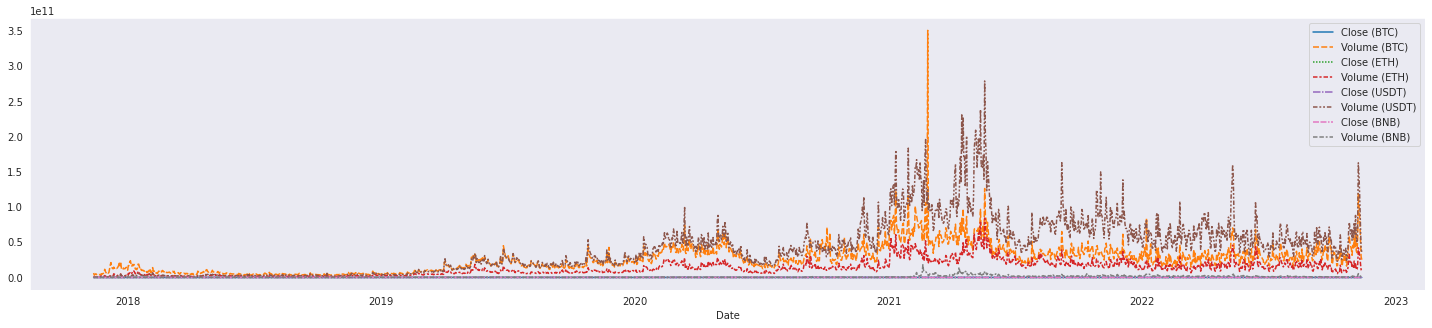

In [16]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

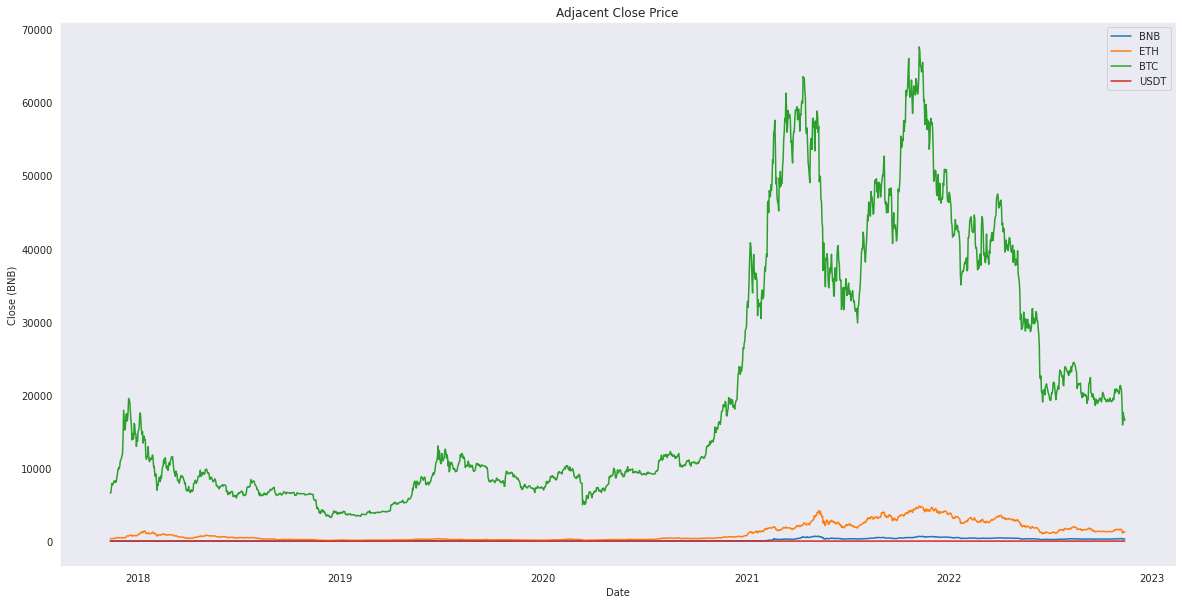

In [17]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

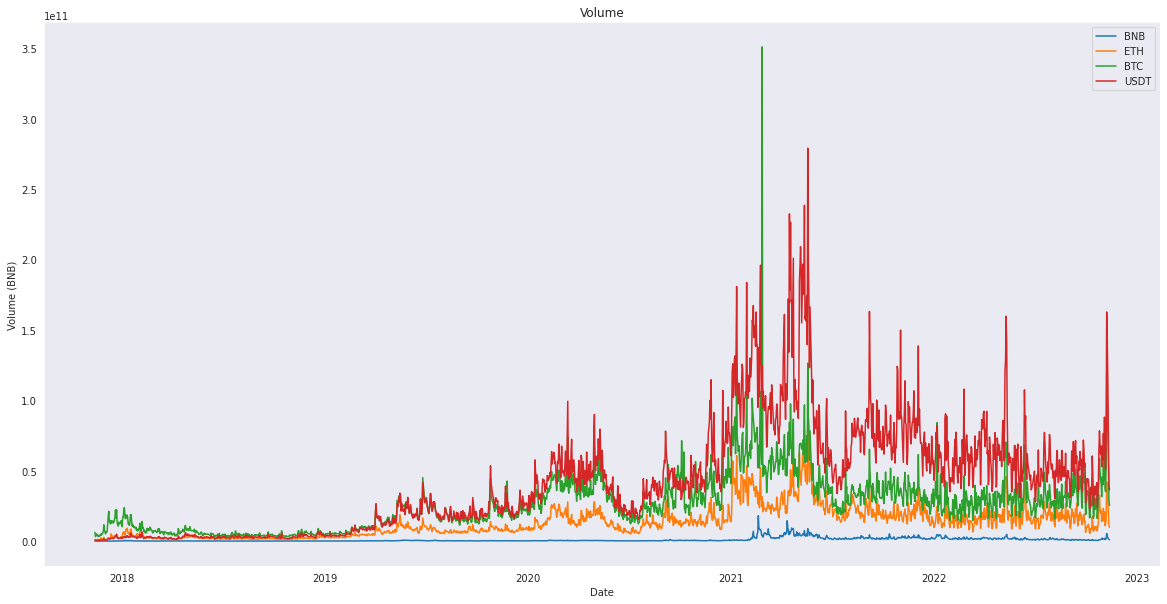

In [18]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

array([[<AxesSubplot:title={'center':'Close (BTC)'}>,
        <AxesSubplot:title={'center':'Volume (BTC)'}>,
        <AxesSubplot:title={'center':'Close (ETH)'}>,
        <AxesSubplot:title={'center':'Volume (ETH)'}>],
       [<AxesSubplot:title={'center':'Close (USDT)'}>,
        <AxesSubplot:title={'center':'Volume (USDT)'}>,
        <AxesSubplot:title={'center':'Close (BNB)'}>,
        <AxesSubplot:title={'center':'Volume (BNB)'}>]], dtype=object)

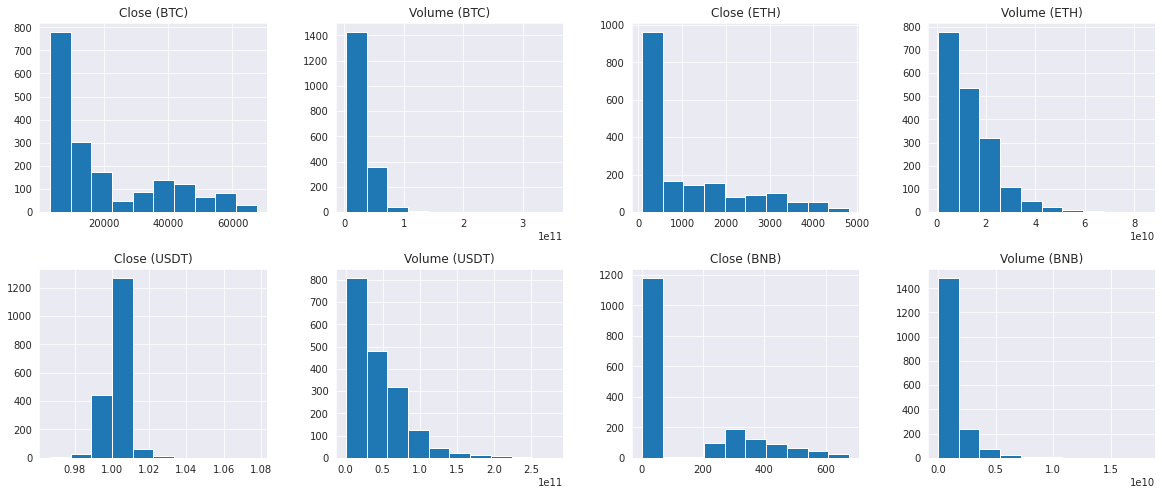

In [19]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

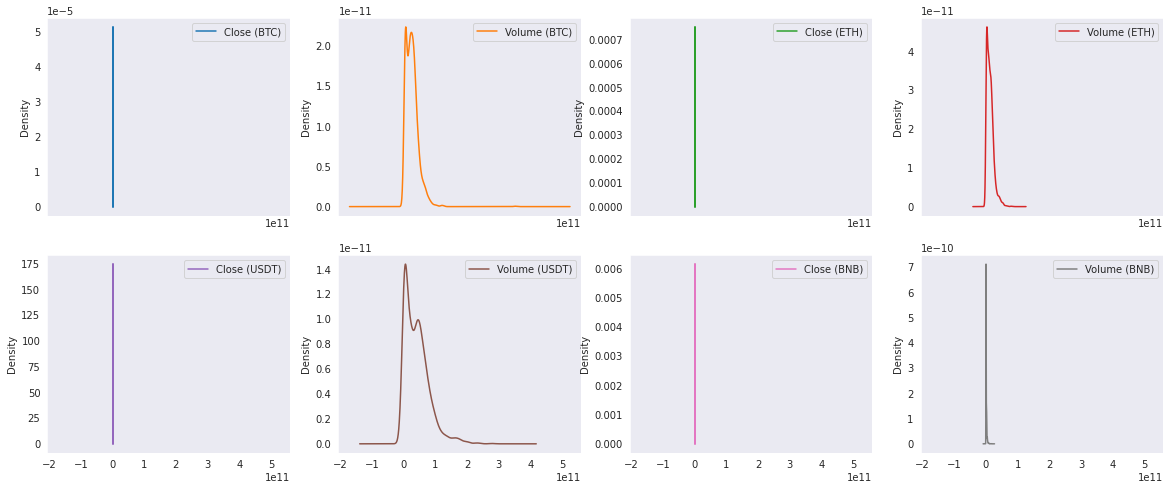

In [20]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

### checking for correlation

In [21]:
data.corr()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Close (BTC),1.000000,0.557256,0.924279,0.663828,-0.149198,0.764386,0.901170,0.763834
Volume (BTC),0.557256,1.000000,0.379869,0.857082,-0.099763,0.868006,0.411914,0.598650
Close (ETH),0.924279,0.379869,1.000000,0.542396,-0.152128,0.625146,0.955627,0.649964
Volume (ETH),0.663828,0.857082,0.542396,1.000000,-0.120140,0.946822,0.565180,0.698011
Close (USDT),-0.149198,-0.099763,-0.152128,-0.120140,1.000000,-0.140837,-0.162630,-0.116329
Volume (USDT),0.764386,0.868006,0.625146,0.946822,-0.140837,1.000000,0.653352,0.773241
Close (BNB),0.901170,0.411914,0.955627,0.565180,-0.162630,0.653352,1.000000,0.718600
Volume (BNB),0.763834,0.598650,0.649964,0.698011,-0.116329,0.773241,0.718600,1.000000


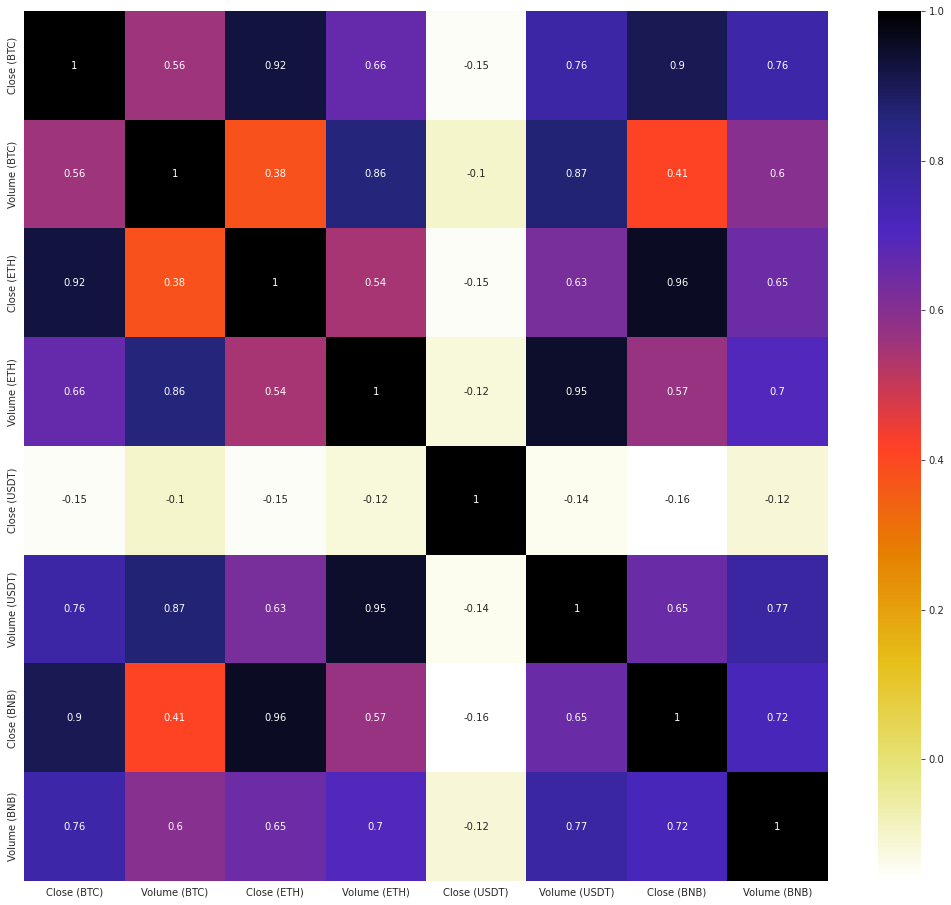

In [22]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

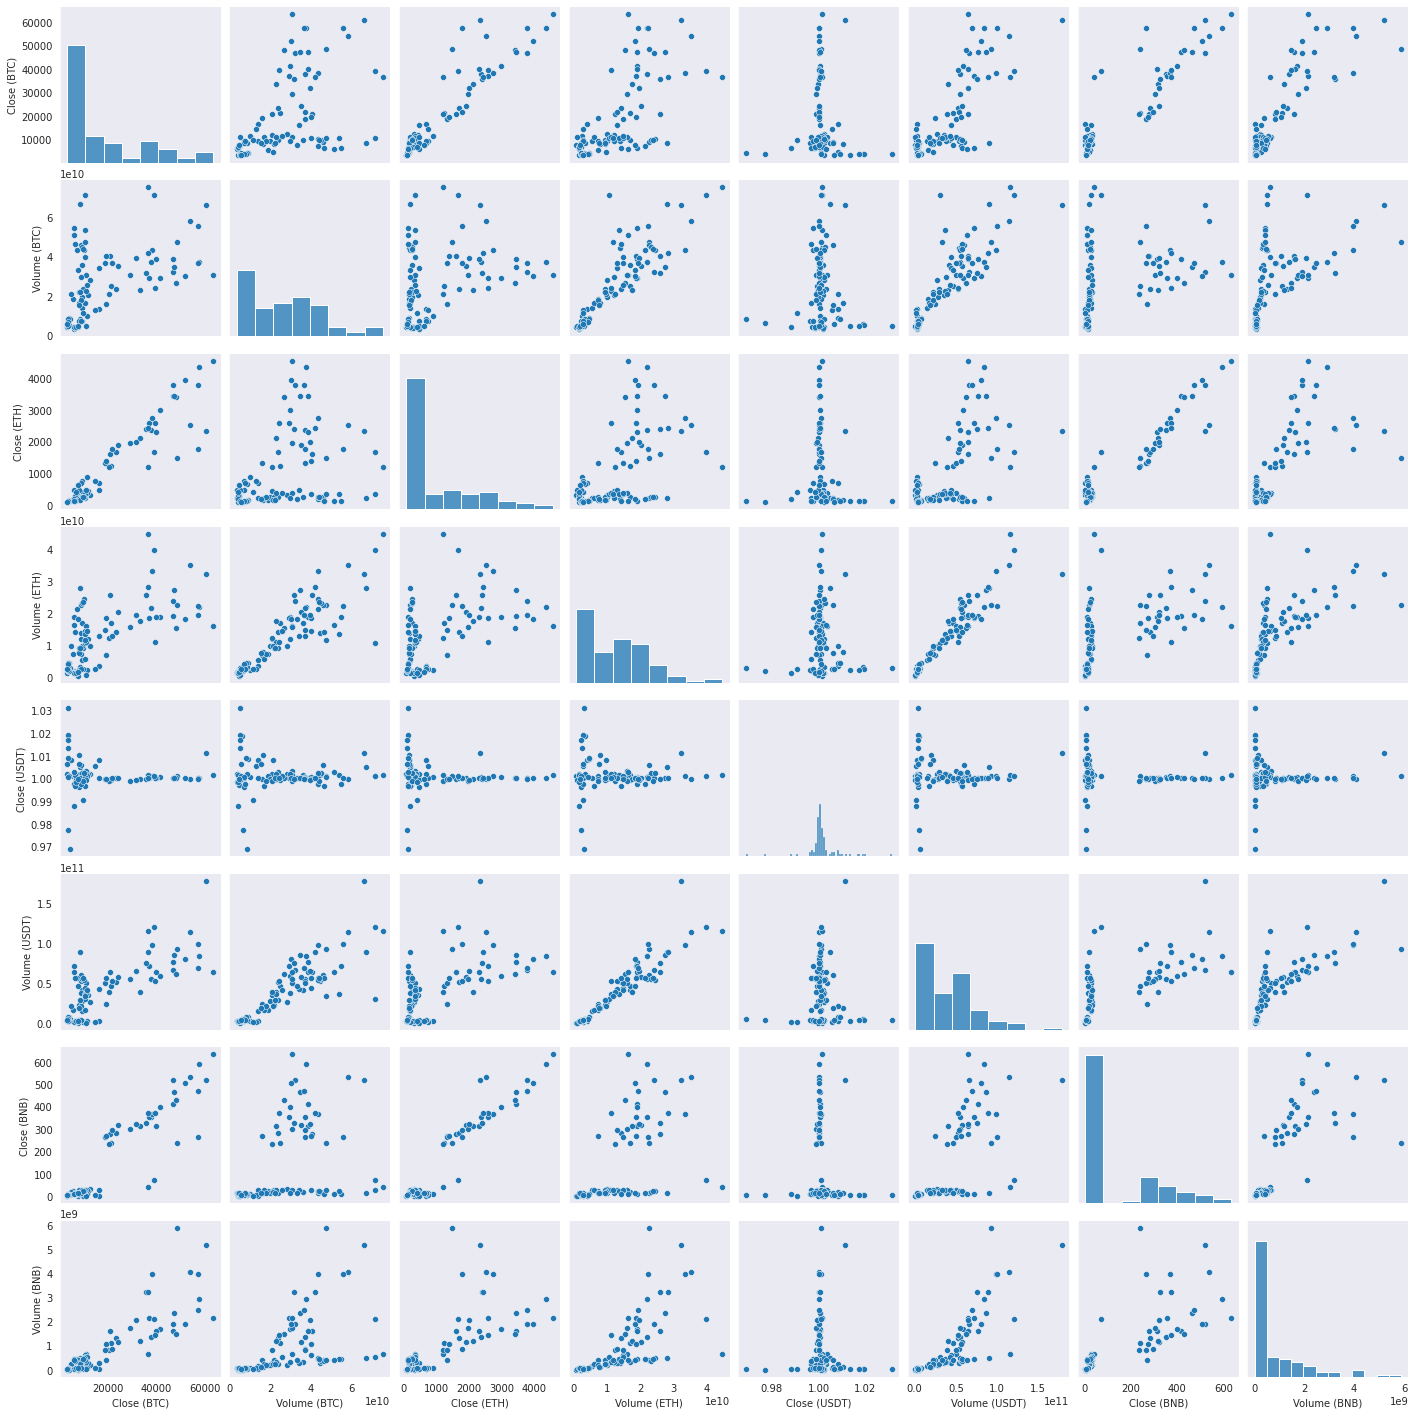

In [23]:
sns.pairplot(data.sample(n=100));

In [24]:
# import pandas_profiling
# pandas_profiling.ProfileReport(data)

# data Pre-processing

In [25]:
# X = data.loc[:, ['Adj Close (BNB)', 'Adj Close (USDT)', 'Adj Close (ETH)']]
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [26]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2017-11-13 00:00:00+00:00,6263249920,316.716003,1041889984,1.00935,767884032,1.68662,12238800
2017-11-14 00:00:00+00:00,3197110016,337.631012,1069680000,1.00683,429857984,1.59258,7829600
2017-11-15 00:00:00+00:00,4200880128,333.356995,722665984,1.00318,449671008,1.53045,7615500
2017-11-16 00:00:00+00:00,5123809792,330.924011,797254016,1.00212,650278976,1.57792,8928640
2017-11-17 00:00:00+00:00,4651670016,332.394012,621732992,1.00139,639398016,1.51036,8508840


In [27]:
Y.head()

Date
2017-11-13 00:00:00+00:00    6559.490234
2017-11-14 00:00:00+00:00    6635.750000
2017-11-15 00:00:00+00:00    7315.540039
2017-11-16 00:00:00+00:00    7871.689941
2017-11-17 00:00:00+00:00    7708.990234
Name: Close (BTC), dtype: float64

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [29]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Selection

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BaseLine Modeling




In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

In [34]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [35]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [36]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

# Evaluation

In [37]:
Y_pred_neigh = neigh.predict(X_test)
r2neigh = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

Y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(Y_test, Y_pred_dt)

Y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(Y_test, Y_pred_est)

In [38]:
print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2neigh)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2est)
print("-"*30)

********** Accuracy **********
------------------------------
K nearest neighbors:  0.9824711000251249
------------------------------
------------------------------
random forest:  0.9730255846234562
------------------------------
------------------------------
decision tree:  0.9434392692514241
------------------------------
------------------------------
gradient boosting:  0.9628064070555195
------------------------------


result: random forest gives the highest accuracy.

In [39]:
# plt.figure(figsize = (20, 10))
# sns.set_style('darkgrid')
# sns.lineplot(x = X_test.index, y = Y_pred, label = "Predicted Price")
# sns.lineplot(x = X_test.index, y = Y_test, label = "Actual Price")
# plt.title('Actual vs Predicted values in test data')

In [40]:
# plt.figure(figsize = (20, 10))
# sns.set_style('darkgrid')
# sns.lineplot(x = X_train.index, y = rf.predict(X_train), label = "Predicted Price")
# sns.lineplot(x = X_train.index, y = Y_train, label = "Actual Price")
# plt.title('Actual vs Predicted values in training data')

# Hyperparameter Tuning

In [41]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [42]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 1

In [43]:
rf_random.best_params_

{'n_estimators': 140,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'bootstrap': False}

# Model Evaluation (performance analysis)

In [44]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

print("-"*30)
print("Accuracy: ", r2rf)
print("-"*30)

------------------------------
Accuracy:  0.9759947063225903
------------------------------


# Machine Learning Explainability

In [45]:
import shap

In [46]:
shap.initjs()

In [47]:
shap_values = shap.TreeExplainer(rf).shap_values(X_test)

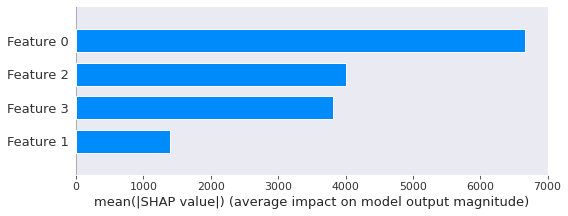

In [48]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

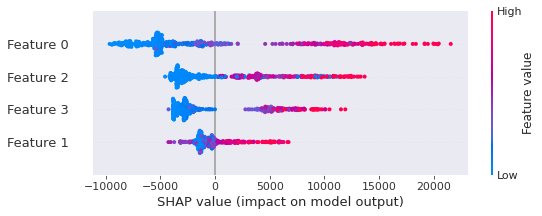

In [49]:
shap.summary_plot(shap_values, X_test)

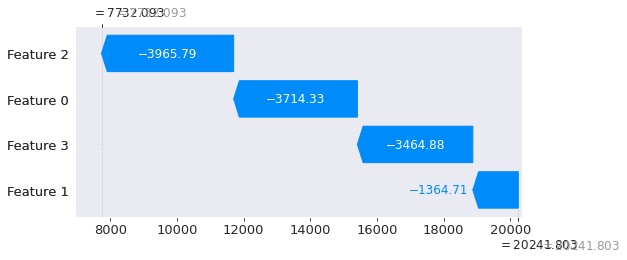

[0.10397884 0.00641673 0.01610635 0.00812482]


In [50]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf).expected_value[0], 
                                       shap_values[row],
                                      )

print(X_test[111])

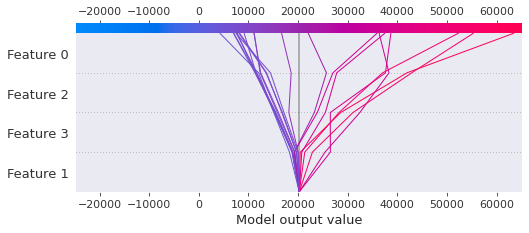

In [51]:
shap.decision_plot(shap.TreeExplainer(rf).expected_value[0], 
                   shap_values[110:130])

In [52]:
shap.force_plot(shap.TreeExplainer(rf).expected_value, shap_values[0:257], X_test[0:257])